<p style = "font-size : 49px; color : #393e46 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #00adb5; border-radius: 5px 5px;"><strong>Image Classification with ANN</strong></p>

In [1]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# loading data

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# shape of data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
# data type of dataset
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [5]:
# creating validation data and scaling data to range (0-1)
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
X_valid, X_train = X_train[:4000], X_train[4000:]
y_valid, y_train = y_train[:4000], y_train[4000:]


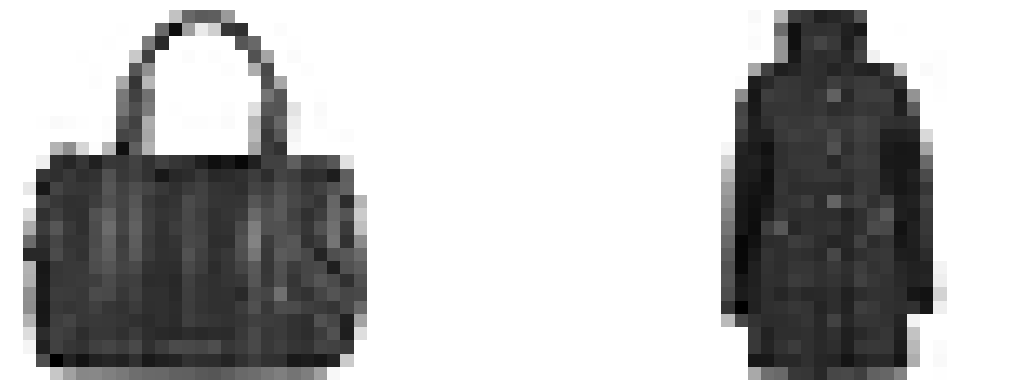

In [6]:
# looking at first two images

plt.figure(figsize = (15, 4))
plotnumber = 1

for i in range(2):
    if plotnumber <= 2:
        ax = plt.subplot(1, 2, plotnumber)
        plt.imshow(X_train[i], cmap = 'binary')
        plt.axis('off')
        
    plotnumber += 1
  
plt.tight_layout()
plt.show()

In [7]:
y_train

array([8, 4, 3, ..., 3, 0, 5], dtype=uint8)

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]], class_names[y_train[1]] 

('Bag', 'Coat')

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>The validation set contains 4,000 images, and the test set contains 10,000 images:</strong></p> 

In [10]:
X_valid.shape

(4000, 28, 28, 1)

In [11]:
X_test.shape

(10000, 28, 28, 1)

<p style = "font-size : 40px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Let’s take a look at a sample of the images in the dataset:</strong></p> 

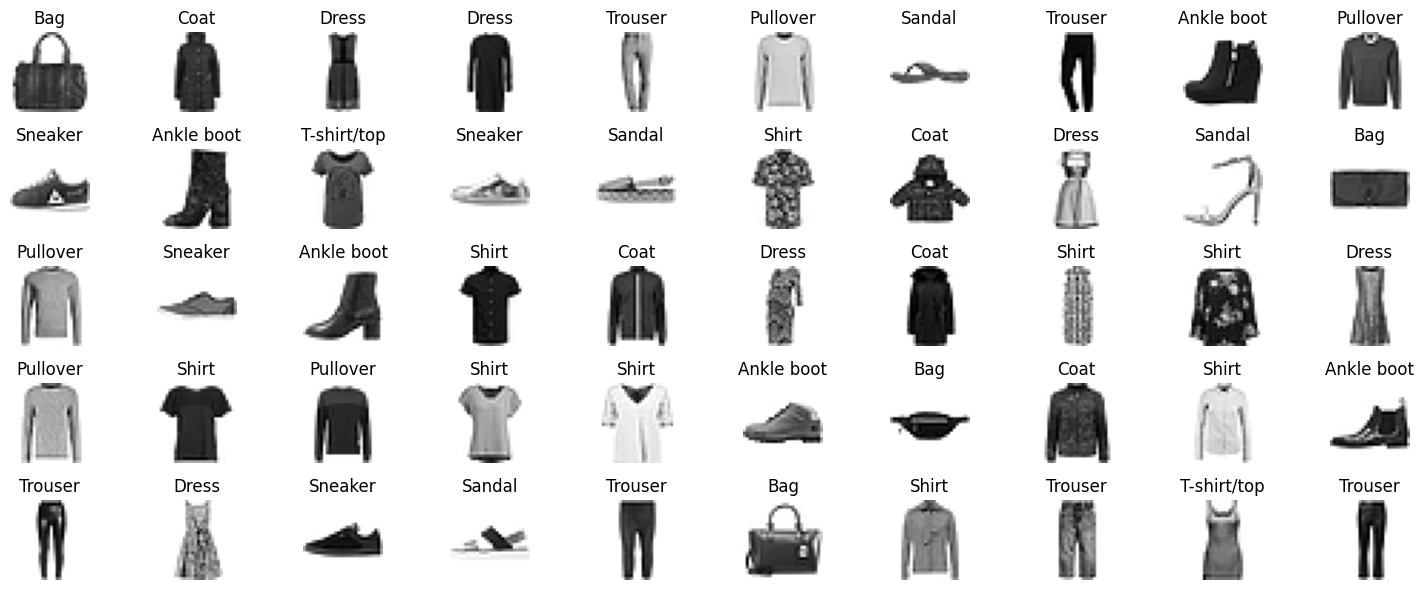

In [12]:
plt.figure(figsize = (15, 6))
plotnumber = 1

for i in range(51):
    if plotnumber <= 50:
        ax = plt.subplot(5, 10, plotnumber)
        plt.imshow(X_train[i], cmap = 'binary')
        plt.axis('off')
        plt.title(class_names[y_train[i]], fontdict = {'fontsize'  : 12, 'color' : 'black'})
        
    plotnumber += 1
  
plt.tight_layout()
plt.show()

<p style = "font-size : 45px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Model Building</strong></p> 

In [13]:
from tensorflow.keras import layers, models

# Define a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [14]:
# summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Compiling the Image Classification Model</strong></p> 

In [15]:
# compiling model

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Training and Evaluating the Image Classification Model</strong></p> 

In [16]:
# fitting model

model_history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 5)

Epoch 1/5
1750/1750 [==============================] - 48s 27ms/step - loss: 0.4992 - accuracy: 0.8153 - val_loss: 0.3474 - val_accuracy: 0.8717
Epoch 2/5
1750/1750 [==============================] - 50s 28ms/step - loss: 0.3193 - accuracy: 0.8826 - val_loss: 0.3168 - val_accuracy: 0.8830
Epoch 3/5
1750/1750 [==============================] - 48s 28ms/step - loss: 0.2729 - accuracy: 0.8993 - val_loss: 0.2780 - val_accuracy: 0.8975
Epoch 4/5
1750/1750 [==============================] - 49s 28ms/step - loss: 0.2455 - accuracy: 0.9087 - val_loss: 0.2959 - val_accuracy: 0.8945
Epoch 5/5
1750/1750 [==============================] - 49s 28ms/step - loss: 0.2225 - accuracy: 0.9174 - val_loss: 0.2595 - val_accuracy: 0.9047


In [17]:
# evaluating model

model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.2610 - accuracy: 0.9083


[0.2609742283821106, 0.90829998254776]

<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Visualizing model</strong></p> 

In [18]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Visualizing Training and Validation Loss</strong></p> 

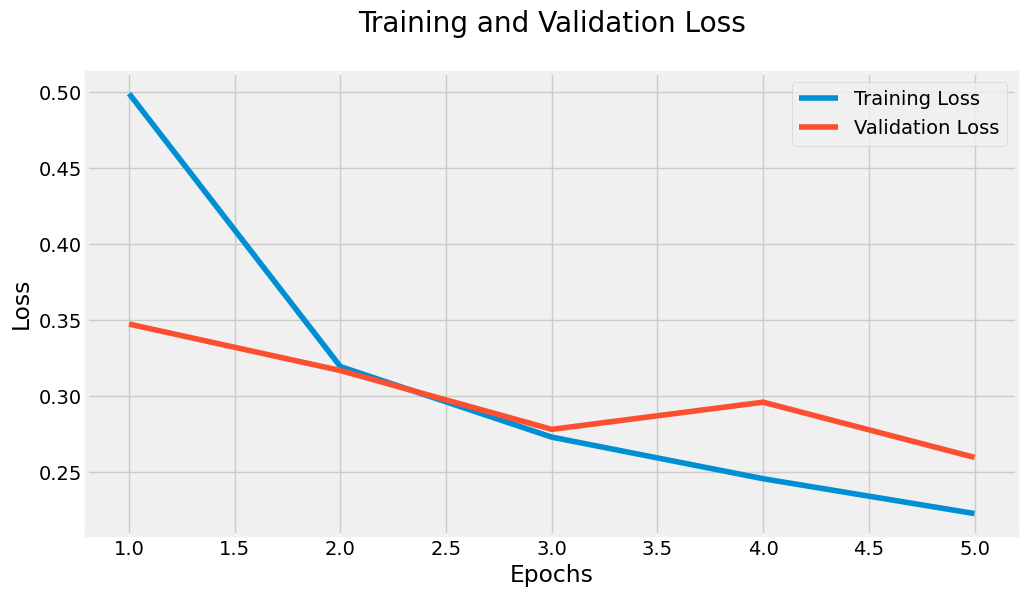

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.style.use('fivethirtyeight')

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epoch = range(1, len(train_loss) + 1)  # Adjust range based on actual number of epochs

sns.lineplot(x=epoch, y=train_loss, label='Training Loss')
sns.lineplot(x=epoch, y=val_loss, label='Validation Loss')

plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()


<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Visualizing Training and Validation accuracy</strong></p> 

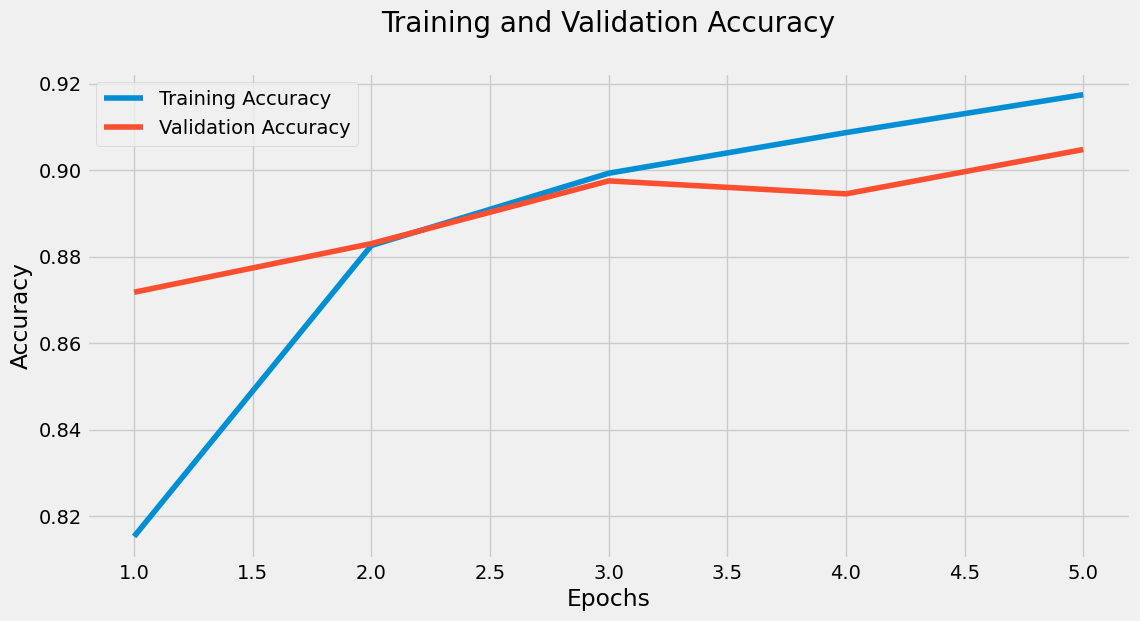

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

train_accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
epoch = range(1, len(train_accuracy) + 1)  # Adjust range based on the actual number of epochs

sns.lineplot(x=epoch, y=train_accuracy, label='Training Accuracy')
sns.lineplot(x=epoch, y=val_accuracy, label='Validation Accuracy')

plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


In [21]:
# making predictions

y_probs = model.predict(X_test)
y_preds = y_probs.argmax(axis = 1)

y_preds[:100]

313/313 [==============================] - 3s 10ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 7,
       7, 5, 1, 2, 6, 0, 9, 3, 8, 8, 1, 3, 8, 0, 7, 5, 7, 9, 6, 1, 6, 9,
       6, 9, 2, 1, 2, 6, 4, 4, 5, 8, 2, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1,
       6, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 2, 5, 3, 6, 7, 1, 8, 0, 1, 2, 2], dtype=int64)

In [22]:
# function for confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

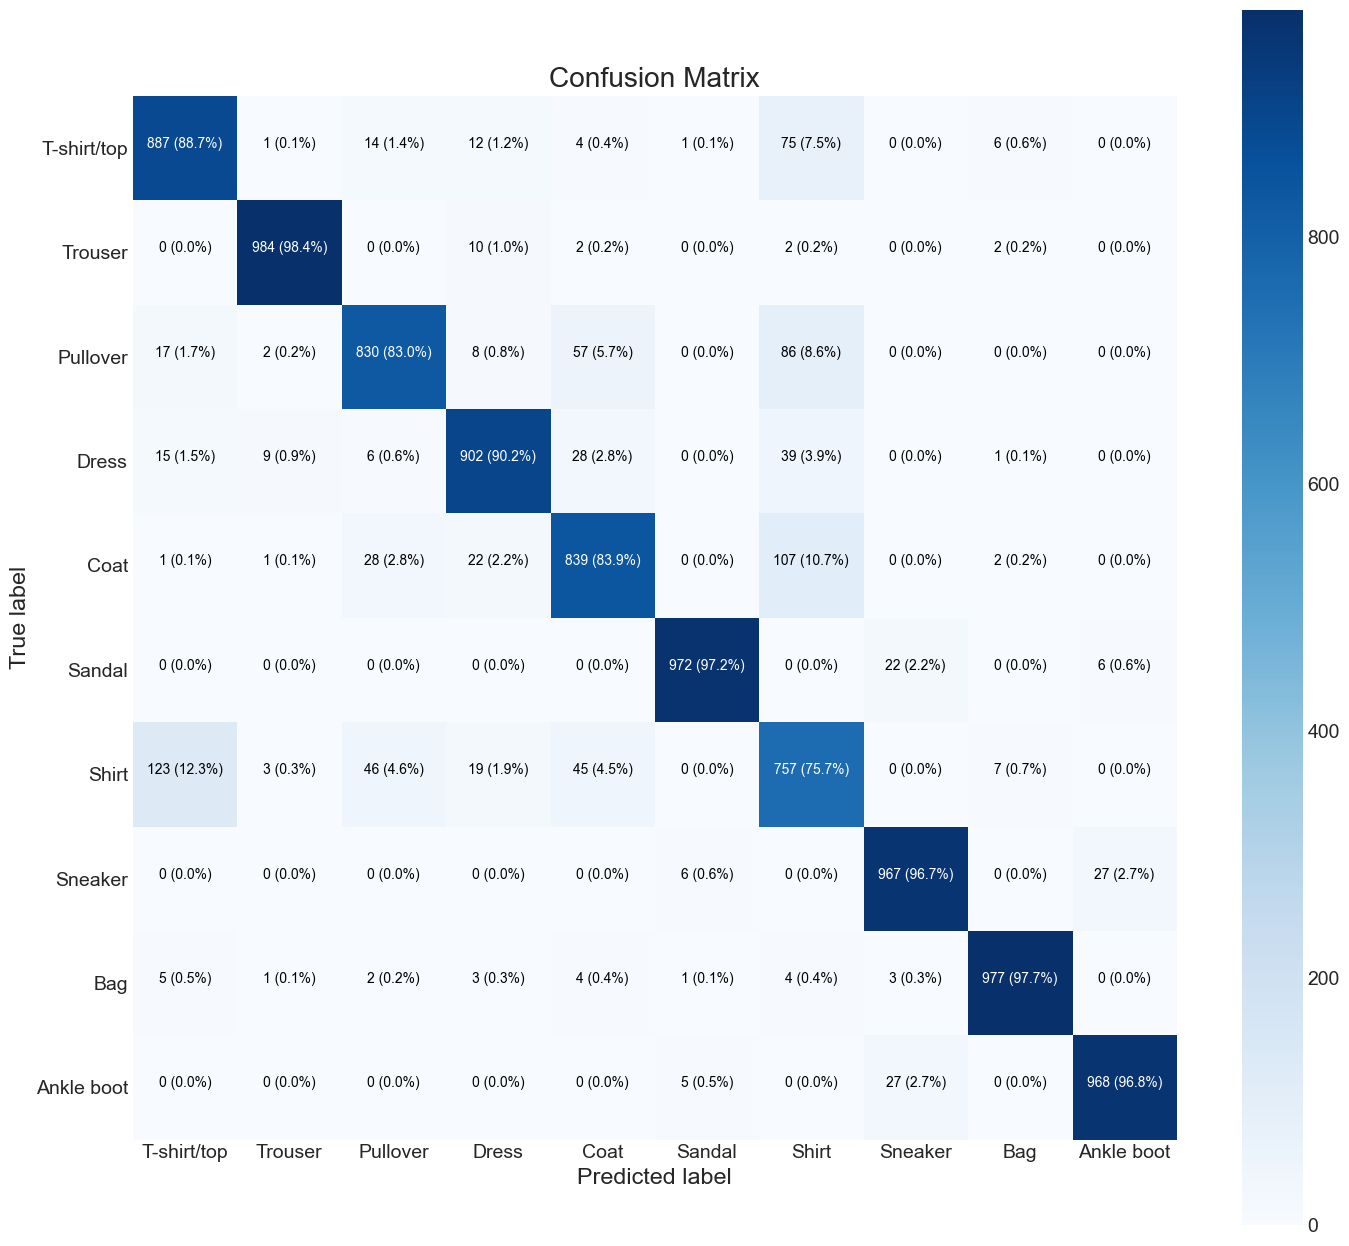

In [23]:
plt.style.use('seaborn-dark')
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [24]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Looking at some Random Predictions</strong></p> 

1/1 [==============================] - 0s 37ms/step


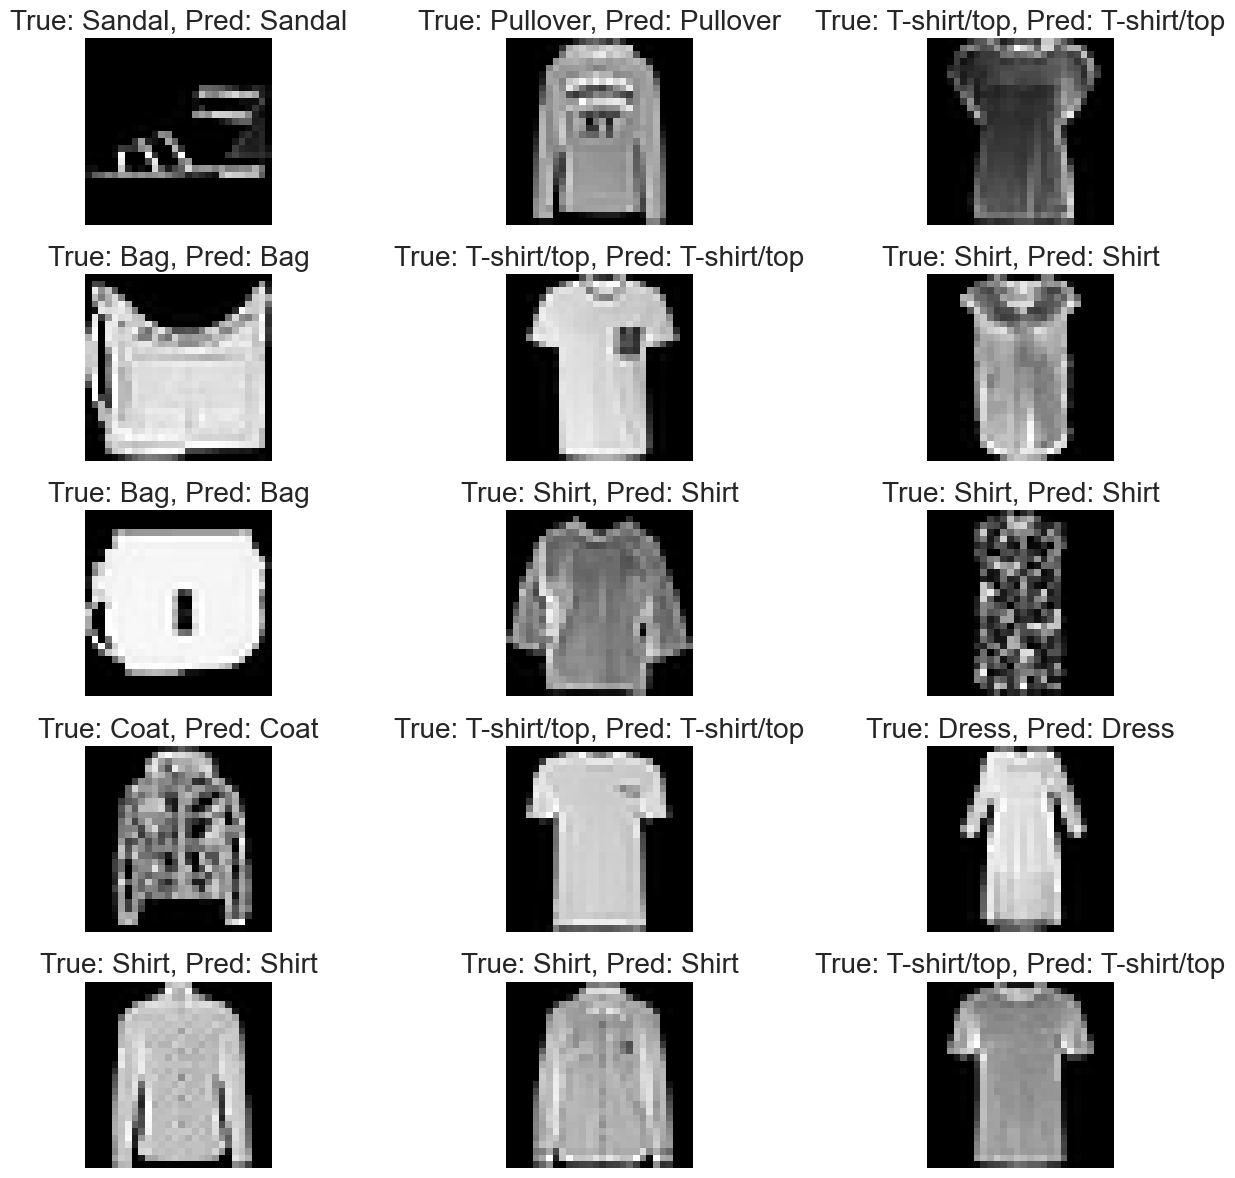

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function to plot random images with predictions
def plot_random_image(model, images, true_labels, classes):
    i = np.random.randint(0, len(images))
    # Get the image and true label
    target_image = images[i]
    true_label = classes[true_labels[i]]
    
    # Ensure the image has the correct dimensions
    target_image_reshaped = target_image.reshape(1, 28, 28, 1)  # Add channel dimension

    # Make predictions
    pred_probs = model.predict(target_image_reshaped)
    pred_label = classes[pred_probs.argmax()]
    
    # Plot the image
    plt.imshow(target_image.squeeze(), cmap='gray')
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis(False)

# Plot random images with predictions
plt.figure(figsize=(15, 12))
plotnumber = 1

for _ in range(15):
    if plotnumber <= 15:
        ax = plt.subplot(5, 3, plotnumber)
        plot_random_image(model=model, 
                          images=X_test, 
                          true_labels=y_test, 
                          classes=class_names)
        
        plotnumber += 1
  
plt.tight_layout()
plt.show()


<p style = "font-size : 34px; color : #fed049 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #007580; border-radius: 5px 5px;"><strong>Use the Model to Make Predictions</strong></p> 

In [28]:
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 33ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.12, 0.  , 0.01, 0.  , 0.03, 0.  , 0.84, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [29]:
import numpy as np

# Predict probabilities for each class
y_pred_prob = model.predict(X_new)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=-1)
y_pred


1/1 [==============================] - 0s 47ms/step


array([9, 2, 1, 1, 6], dtype=int64)

In [30]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Here, the classification model actually classified all five images correctly</strong></p> 

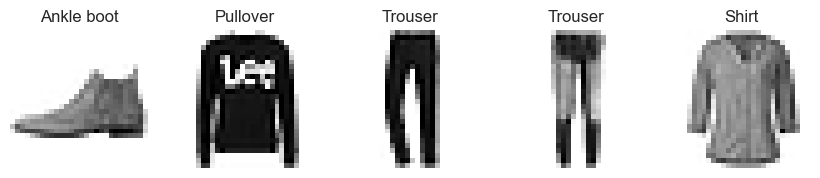

In [31]:
y_new = y_test[:5]
plt.figure(figsize=(9.2, 4.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

<p style = "font-size : 35px; color : #f55c47 ; font-family : 'Comic Sans MS'; "><strong>If you like my work, please do Upvote.</strong></p> 

In [32]:
# Save the model
model.save('fashion_mnist_cnn_model.h5')
